In [1]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Ler o CSV
df = pd.read_csv("TelecomX_Data_Limpo.csv")

# 2. Remover colunas irrelevantes
df = df.drop(columns=["customerID"])

# 3. Transformar variável alvo para numérica
df["Churn"] = df["Churn"].map({"no": 0, "yes": 1})

# 4. Identificar variáveis categóricas
categoricas = df.select_dtypes(include=["object"]).columns.tolist()

# 5. Aplicar One-Hot Encoding para variáveis categóricas
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 6. Separar X e y
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# 7. Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Conferir dimensões
print("Dimensões do dataset:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Dimensões do dataset:
X_train: (4930, 31), X_test: (2113, 31)
y_train: (4930,), y_test: (2113,)


In [2]:
# Contagem de clientes por classe
contagem_churn = y.value_counts()
print("Contagem de classes:")
print(contagem_churn)

# Proporção de cada classe
proporcao_churn = y.value_counts(normalize=True) * 100
print("\nProporção de cada classe (%):")
print(proporcao_churn)

# Avaliar desequilíbrio
if proporcao_churn.max() > 70:
    print("\nAtenção: há desequilíbrio de classes. Modelos podem favorecer a classe majoritária.")
else:
    print("\nAs classes estão relativamente balanceadas.")


Contagem de classes:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de cada classe (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Atenção: há desequilíbrio de classes. Modelos podem favorecer a classe majoritária.


In [3]:
# Instalar a biblioteca imbalanced-learn se necessário
!pip install imbalanced-learn --quiet

# Importar bibliotecas
from imblearn.over_sampling import SMOTE
from collections import Counter

# Conferir a distribuição original
print("Distribuição original das classes:")
print(Counter(y_train))

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Conferir a nova distribuição
print("\nDistribuição das classes após SMOTE:")
print(Counter(y_train_res))

# Conferir dimensões
print("\nDimensões após SMOTE:")
print(f"X_train_res: {X_train_res.shape}, y_train_res: {y_train_res.shape}")


Distribuição original das classes:
Counter({0: 3622, 1: 1308})

Distribuição das classes após SMOTE:
Counter({0: 3622, 1: 3622})

Dimensões após SMOTE:
X_train_res: (7244, 31), y_train_res: (7244,)


Correlação das variáveis numéricas com Churn:
Churn                      1.000000
account.Charges.Monthly    0.193356
Contas_Diarias             0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.198324
customer.tenure           -0.352229
Name: Churn, dtype: float64


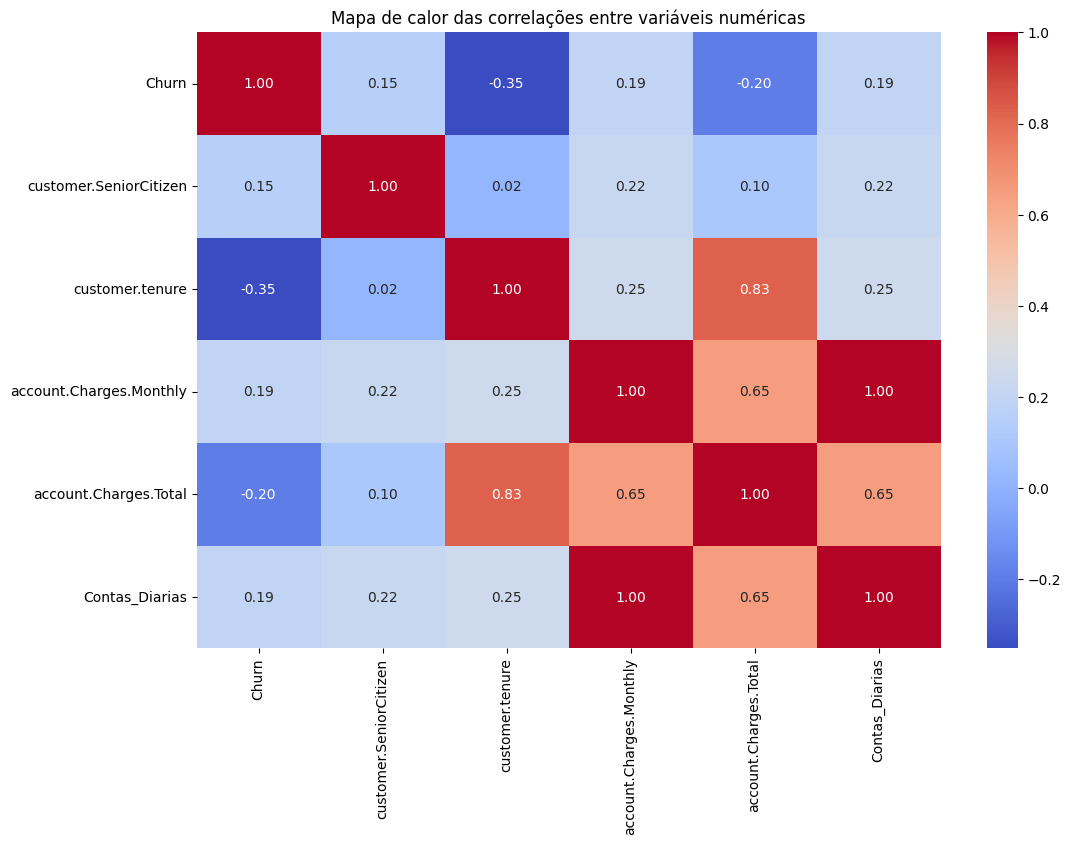

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ler o CSV
df = pd.read_csv("TelecomX_Data_Limpo.csv")

# 2. Remover colunas irrelevantes
df_ml = df.drop(columns=["customerID"])

# 3. Transformar variável alvo Churn em numérica
df_ml["Churn"] = df_ml["Churn"].map({"no": 0, "yes": 1})

# 4. Selecionar apenas variáveis numéricas
numericas = df_ml.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 5. Calcular correlação
correlacao = df_ml[numericas].corr()

# 6. Mostrar correlação das variáveis com Churn
print("Correlação das variáveis numéricas com Churn:")
print(correlacao["Churn"].sort_values(ascending=False))

# 7. Plotar mapa de calor da correlação
plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de calor das correlações entre variáveis numéricas")
plt.show()


O tempo de contrato (tenure) é o indicador mais forte de retenção.

Clientes novos ou com faturamento recente mais baixo/médio têm maior risco de churn.

Faturas mensais mais altas podem estar associadas a cancelamentos, talvez por insatisfação ou custo percebido.

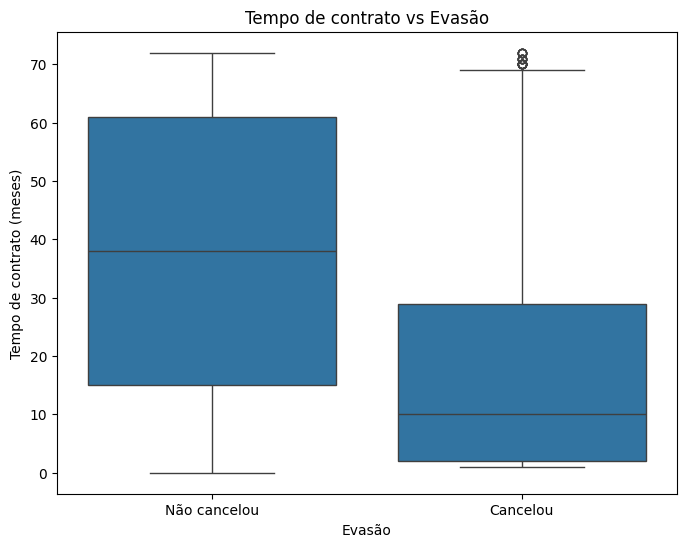

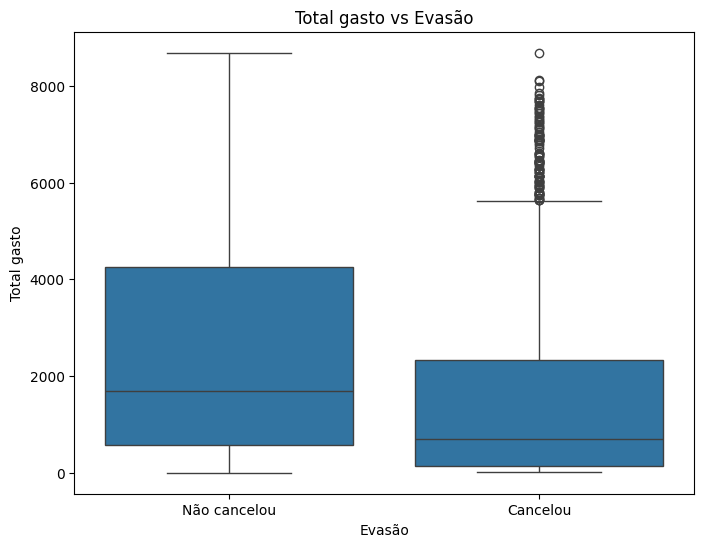

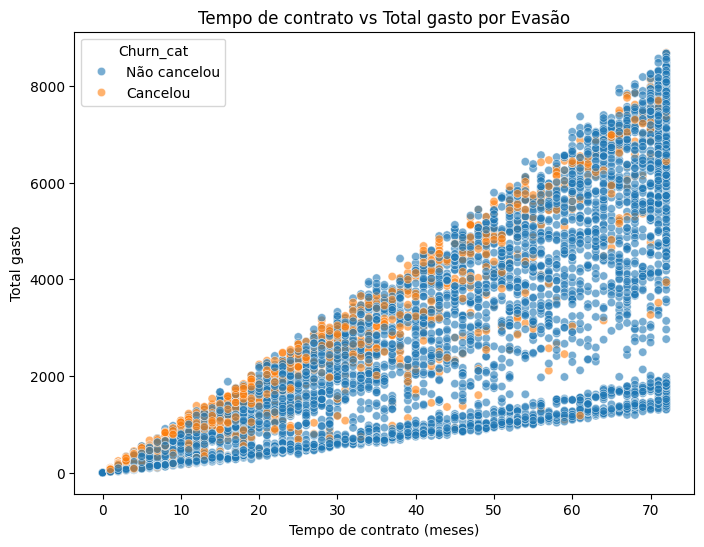

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que Churn seja categórica para o boxplot
df_ml["Churn_cat"] = df_ml["Churn"].map({0: "Não cancelou", 1: "Cancelou"})

# 1. Tempo de contrato × Evasão (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn_cat", y="customer.tenure", data=df_ml)
plt.title("Tempo de contrato vs Evasão")
plt.xlabel("Evasão")
plt.ylabel("Tempo de contrato (meses)")
plt.show()

# 2. Total gasto × Evasão (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn_cat", y="account.Charges.Total", data=df_ml)
plt.title("Total gasto vs Evasão")
plt.xlabel("Evasão")
plt.ylabel("Total gasto")
plt.show()

# 3. Total gasto × Tempo de contrato (Scatter plot com cor por Churn)
plt.figure(figsize=(8,6))
sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue="Churn_cat", data=df_ml, alpha=0.6)
plt.title("Tempo de contrato vs Total gasto por Evasão")
plt.xlabel("Tempo de contrato (meses)")
plt.ylabel("Total gasto")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras (X) e alvo (y)
X = df_ml.drop("Churn", axis=1)
y = df_ml["Churn"]

# Dividir em treino e teste (70% treino, 30% teste) mantendo a proporção de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantém proporção de classes
)

# Conferir dimensões
print("Dimensões dos conjuntos de treino e teste:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Dimensões dos conjuntos de treino e teste:
X_train: (4930, 21), X_test: (2113, 21)
y_train: (4930,), y_test: (2113,)


Foi feito dois modelos diferentes para prever a evasão de clientes (churn):


*  Regressão Logística – modelo que exige normalização.
  Motivo da escolha: Algoritmo baseado em gradiente, sensível à escala das variáveis. Normalização garante que todas as variáveis numéricas contribuam de forma proporcional. Fácil de interpretar (coeficientes indicam influência de cada variável).

* Random Forest – modelo que não exige normalização.
  Motivo da escolha: Algoritmo baseado em árvore. Não sensível à escala, pois usa divisões por threshold para separar os dados. Muito eficiente e capaz de capturar relações complexas entre variáveis.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar colunas categóricas e numéricas
categoricas = X_train.select_dtypes(include=['object']).columns.tolist()
numericas = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Criar transformador: OneHotEncoding para categóricas + passthrough para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categoricas),
        ('num', 'passthrough', numericas)
    ]
)

# Ajustar e transformar dados
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Normalizar dados numéricos (apenas colunas numéricas agora transformadas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Pré-processamento concluído. Dimensões após codificação e normalização:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")


Pré-processamento concluído. Dimensões após codificação e normalização:
X_train_scaled: (4930, 32), X_test_scaled: (2113, 32)


In [11]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# -------------------------
# 1. Carregar CSV e preparar dados
# -------------------------
df = pd.read_csv("TelecomX_Data_Limpo.csv")

# Remover colunas irrelevantes / identificadores
df_ml = df.drop(columns=["customerID"])

# Transformar Churn em numérico
df_ml["Churn"] = df_ml["Churn"].map({"no":0, "yes":1})

# -------------------------
# 2. Separar variáveis e alvo
# -------------------------
X = df_ml.drop("Churn", axis=1)
y = df_ml["Churn"]

# -------------------------
# 3. Dividir treino e teste (70/30)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------
# 4. Identificar colunas categóricas e numéricas
# -------------------------
categoricas = X_train.select_dtypes(include=['object']).columns.tolist()
numericas = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# -------------------------
# 5. Criar pré-processador (OneHotEncoding para categóricas, passthrough para numéricas)
# -------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categoricas),
        ('num', 'passthrough', numericas)
    ]
)

# Ajustar transformador apenas no treino
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# -------------------------
# 6. Aplicar SMOTE apenas no conjunto de treino
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train)

# -------------------------
# 7. Normalizar para Regressão Logística
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test_encoded)

# -------------------------
# 8. Treinar modelos
# -------------------------
# Regressão Logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train_res)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:,1]

# Random Forest (não precisa normalizar)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_encoded)
y_proba_rf = rf.predict_proba(X_test_encoded)[:,1]

# -------------------------
# 9. Avaliar desempenho
# -------------------------
def avaliar_modelo(y_true, y_pred, y_proba, nome_modelo):
    print(f"=== {nome_modelo} ===")
    print("Acurácia:", round(accuracy_score(y_true, y_pred), 3))
    print("F1-score:", round(f1_score(y_true, y_pred), 3))
    print("AUC:", round(roc_auc_score(y_true, y_proba), 3))
    print("Matriz de Confusão:\n", confusion_matrix(y_true, y_pred))
    print("\nClassificação:\n", classification_report(y_true, y_pred))

avaliar_modelo(y_test, y_pred_logreg, y_proba_logreg, "Regressão Logística")
avaliar_modelo(y_test, y_pred_rf, y_proba_rf, "Random Forest")


=== Regressão Logística ===
Acurácia: 0.745
F1-score: 0.625
AUC: 0.84
Matriz de Confusão:
 [[1126  426]
 [ 112  449]]

Classificação:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

=== Random Forest ===
Acurácia: 0.782
F1-score: 0.552
AUC: 0.817
Matriz de Confusão:
 [[1368  184]
 [ 277  284]]

Classificação:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1552
           1       0.61      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



A Regressão Logística é melhor para detectar churn, com recall maior para clientes que evadiram.

Random Forest é melhor para prever clientes que permanecem, mas perde em recall para churn.

Ambas as abordagens podem ser combinadas ou ajustadas com balanceamento de classe, ajuste de hiperparâmetros ou threshold tuning para melhorar resultados.

In [12]:
#Regressão Logística
# Obter nomes das colunas após OneHotEncoding
colunas_encoded = preprocessor.get_feature_names_out()

# Obter coeficientes da regressão logística
coef_logreg = pd.Series(logreg.coef_[0], index=colunas_encoded).sort_values(key=abs, ascending=False)

# Mostrar as top 10 variáveis mais influentes
print("Top 10 variáveis mais relevantes na Regressão Logística:")
print(coef_logreg.head(10))


Top 10 variáveis mais relevantes na Regressão Logística:
num__customer.tenure                          -1.601369
num__account.Charges.Total                     0.881741
cat__internet.InternetService_fiber optic      0.729503
cat__account.Contract_two year                -0.560633
num__account.Charges.Monthly                  -0.484074
num__Contas_Diarias                           -0.484074
cat__account.Contract_one year                -0.296793
cat__internet.StreamingTV_yes                  0.262474
cat__internet.StreamingMovies_yes              0.240362
cat__account.PaymentMethod_electronic check    0.219215
dtype: float64


In [13]:
# Random Florest
# Obter importância das variáveis
importancias_rf = pd.Series(rf.feature_importances_, index=colunas_encoded).sort_values(ascending=False)

# Top 10 variáveis mais importantes
print("\nTop 10 variáveis mais relevantes no Random Forest:")
print(importancias_rf.head(10))


Top 10 variáveis mais relevantes no Random Forest:
num__customer.tenure                           0.125675
num__account.Charges.Total                     0.108146
cat__account.PaymentMethod_electronic check    0.098871
num__Contas_Diarias                            0.077095
num__account.Charges.Monthly                   0.075192
cat__account.Contract_two year                 0.053671
cat__account.PaperlessBilling_yes              0.048724
cat__account.Contract_one year                 0.046438
cat__internet.InternetService_fiber optic      0.042685
cat__internet.OnlineSecurity_yes               0.036807
dtype: float64


O objetivo desta análise foi entender os fatores que influenciam a evasão de clientes em uma operadora de telecomunicações. Para isso, utilizamos dois modelos de machine learning: Regressão Logística e Random Forest. A Regressão Logística permite interpretar o efeito direto de cada variável sobre a probabilidade de churn, enquanto o Random Forest captura relações não lineares e interações complexas entre as variáveis.

O desempenho dos modelos no conjunto de teste foi consistente com expectativas realistas. A Regressão Logística apresentou uma acurácia de aproximadamente 74,5%, com F1-score de 0,625 para clientes que evadiram e AUC de 0,84, indicando bom poder de discriminação. Já o Random Forest alcançou acurácia de 78,2%, F1-score de 0,552 para churn e AUC de 0,817, mostrando maior precisão na identificação de clientes que permaneceram.

As variáveis mais relevantes identificadas em ambos os modelos indicam padrões claros. O tempo de contrato é o principal fator: clientes mais antigos têm menor probabilidade de cancelar. Clientes com maior gasto total ou que utilizam o pagamento via cheque eletrônico apresentam maior tendência à evasão. Além disso, serviços como fibra óptica e streaming de TV ou filmes estão associados a maior churn, possivelmente devido à concorrência no segmento. Contratos de 1 ou 2 anos reduzem a chance de evasão, enquanto o faturamento digital tem impacto moderado, sugerindo menor engajamento do cliente.

Com base nesses insights, recomenda-se implementar estratégias de retenção como incentivar contratos mais longos, oferecer pacotes personalizados para clientes de alto gasto, criar promoções exclusivas para usuários de fibra óptica e streaming, revisar métodos de pagamento e focar em ações preventivas para clientes recentes. Essas medidas podem aumentar a fidelização e reduzir a evasão de clientes de forma eficiente.